**Asteroid Classification EDA**

*This notebook is my extended data analysis of the datasets. I plot graphs and calculate statistical metrics to analyze and understand the data better.*

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Read in the raw data
df = pd.read_csv('data/raw_data.csv')

df.head()

,pdes,class,score,bad,abs_mag,prop_semimaj_ax,prop_eccen,prop_inclin_sin,osc_semimaj_ax,osc_eccen,...,albedo,rot_per,epoch_mjd,semimaj_ax2,eccentricity,inclin,asc_node_long,peri,mean_anomaly,neo
0,166,C,78,0,9.89,2.6859,0.1759,0.2005,2.6887,0.2101,...,0.046,4.715,60000,2.685,0.2109,12.02,128.90,263.98,53.17,N
1,183,S,0,0,9.68,NaN,NaN,NaN,2.7926,0.3502,...,0.227,11.770,60000,2.795,0.3484,26.40,141.88,264.00,81.89,N
2,208,S,85,0,8.96,2.8929,0.0450,0.0372,2.8929,0.0152,...,0.206,14.085,60000,2.891,0.0107,1.74,4.15,128.27,310.38,N
3,220,X,65,0,11.00,2.3486,0.2037,0.1545,2.3483,0.2578,...,0.055,18.198,60000,2.348,0.2578,7.60,257.84,78.63,66.69,N
4,227,C,92,0,8.70,3.1443,0.2209,0.1846,3.1534,0.1981,...,0.065,26.468,60000,3.173,0.1931,9.09,325.94,268.88,129.51,N


In [3]:
# Get basic statistical measures
df.describe()

,pdes,score,bad,abs_mag,prop_semimaj_ax,prop_eccen,prop_inclin_sin,osc_semimaj_ax,osc_eccen,osc_inclin,diameter,albedo,rot_per,epoch_mjd,semimaj_ax2,eccentricity,inclin,asc_node_long,peri,mean_anomaly
count,44061.000000,44061.000000,44061.000000,44061.000000,41325.000000,41325.000000,41325.000000,44061.000000,44061.000000,44061.000000,22610.000000,22607.000000,7233.000000,44061.0,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000
mean,78005.830167,37.896598,0.735639,14.963050,2.655434,0.129411,0.125962,2.682273,0.134701,8.123990,6.406342,0.168000,32.538165,60000.0,2.682312,0.134652,8.124792,163.910503,184.081064,179.735585
std,48098.025994,26.709379,0.440997,1.217741,0.304113,0.056201,0.072645,0.410899,0.064779,5.390159,6.561775,0.119551,102.767347,0.0,0.410884,0.064774,5.390758,95.482875,102.421983,104.889318
min,166.000000,0.000000,0.000000,8.100000,2.101100,0.000500,0.000500,1.184500,0.001200,0.036800,0.320000,0.001000,0.430000,60000.0,1.184000,0.000700,0.040000,0.020000,0.020000,0.030000
25%,35758.000000,15.000000,0.000000,14.300000,2.386100,0.086800,0.065300,2.385800,0.086100,3.923000,3.289000,0.066000,4.595000,60000.0,2.386000,0.086000,3.920000,89.490000,96.590000,87.570000
50%,73627.000000,31.000000,1.000000,15.100000,2.616700,0.129100,0.112200,2.622200,0.130700,6.892300,4.843000,0.139000,7.964850,60000.0,2.622000,0.130700,6.890000,155.430000,188.490000,179.710000
75%,116978.000000,57.000000,1.000000,15.800000,2.922000,0.167700,0.181500,2.965600,0.177200,11.458100,7.222000,0.249000,20.557000,60000.0,2.966000,0.177200,11.460000,229.640000,271.720000,271.540000
max,173106.000000,99.000000,1.000000,20.300000,3.756100,0.299600,0.300000,20.891800,0.872100,55.424300,126.288000,1.000000,3626.000000,60000.0,20.750000,0.872400,55.430000,359.980000,359.980000,360.000000


In [4]:
# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44061 entries, 0 to 44060
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pdes             44061 non-null  int64  
 1   class            44061 non-null  object 
 2   score            44061 non-null  int64  
 3   bad              44061 non-null  int64  
 4   abs_mag          44061 non-null  float64
 5   prop_semimaj_ax  41325 non-null  float64
 6   prop_eccen       41325 non-null  float64
 7   prop_inclin_sin  41325 non-null  float64
 8   osc_semimaj_ax   44061 non-null  float64
 9   osc_eccen        44061 non-null  float64
 10  osc_inclin       44061 non-null  float64
 11  diameter         22610 non-null  float64
 12  albedo           22607 non-null  float64
 13  rot_per          7233 non-null   float64
 14  epoch_mjd        44061 non-null  int64  
 15  semimaj_ax2      44061 non-null  float64
 16  eccentricity     44061 non-null  float64
 17  inclin      

In [5]:
# Drop unecessary columns
df = df.drop('epoch_mjd', axis=1)
df = df.drop('pdes', axis=1)

df.head(3)

,class,score,bad,abs_mag,prop_semimaj_ax,prop_eccen,prop_inclin_sin,osc_semimaj_ax,osc_eccen,osc_inclin,diameter,albedo,rot_per,semimaj_ax2,eccentricity,inclin,asc_node_long,peri,mean_anomaly,neo
0,C,78,0,9.89,2.6859,0.1759,0.2005,2.6887,0.2101,12.0189,52.393,0.046,4.715,2.685,0.2109,12.02,128.90,263.98,53.17,N
1,S,0,0,9.68,NaN,NaN,NaN,2.7926,0.3502,26.3823,32.927,0.227,11.770,2.795,0.3484,26.40,141.88,264.00,81.89,N
2,S,85,0,8.96,2.8929,0.0450,0.0372,2.8929,0.0152,1.7489,40.056,0.206,14.085,2.891,0.0107,1.74,4.15,128.27,310.38,N


In [6]:
col_names = df.columns
cat_indices = [0, 2, 19]

# Get column names for categorical and numerical columns
categorical = list(col_names[cat_indices])
numerical = list(col_names[list(range(len(col_names)))])
for col in categorical:
    numerical.remove(col)

In [9]:
# Combine redundant columns
df = df.drop(['prop_eccen', 'prop_inclin_sin', 'prop_semimaj_ax'], axis=1)
df['osc_eccentricity'] = (df['osc_eccen'] + df['eccentricity']) / 2
df = df.drop(['osc_eccen', 'eccentricity'], axis=1)

df['osc_semimaj_ax'] = (df['osc_semimaj_ax'] + df['semimaj_ax2']) / 2
df = df.drop('semimaj_ax2', axis=1)

df['osc_inclin'] = (df['osc_inclin'] + df['inclin']) / 2
df = df.drop('inclin', axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44061 entries, 0 to 44060
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   class             44061 non-null  object 
 1   score             44061 non-null  int64  
 2   bad               44061 non-null  int64  
 3   abs_mag           44061 non-null  float64
 4   osc_semimaj_ax    44061 non-null  float64
 5   osc_inclin        44061 non-null  float64
 6   diameter          22610 non-null  float64
 7   albedo            22607 non-null  float64
 8   rot_per           7233 non-null   float64
 9   asc_node_long     44061 non-null  float64
 10  peri              44061 non-null  float64
 11  mean_anomaly      44061 non-null  float64
 12  neo               44061 non-null  object 
 13  osc_eccentricity  44061 non-null  float64
dtypes: float64(10), int64(2), object(2)
memory usage: 4.7+ MB


In [11]:
col_names = df.columns
cat_indices = [0, 2, 12]

# Get categorical and numerical column names in separate lists
categorical = list(col_names[cat_indices])
numerical = list(col_names[list(range(len(col_names)))])
for col in categorical:
    numerical.remove(col)

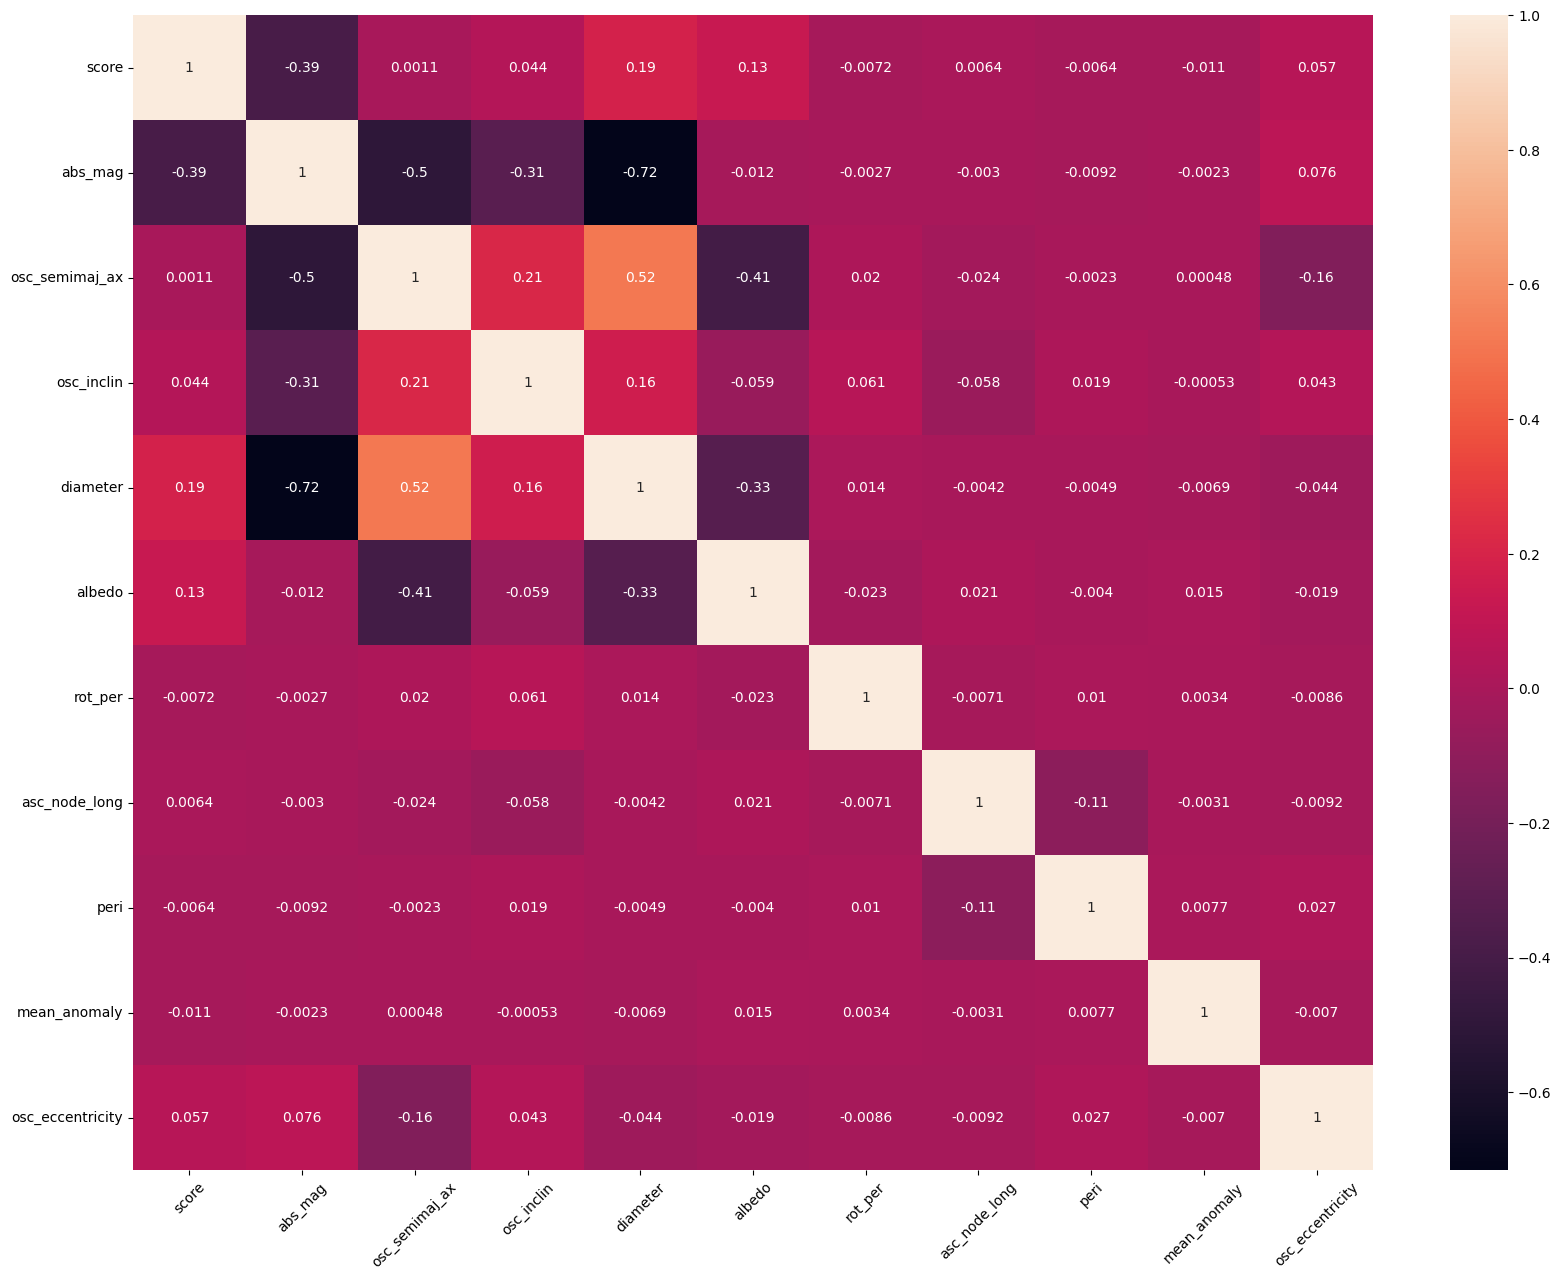

In [12]:
# Calculate linear correlation and plot corresponding heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(data=df[numerical].corr(), annot=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
plt.show()

In [13]:
# Plots grid of bi-variate plots, with center diagonal being histogram distribution
sns.pairplot(df)

c:\Users\rules\OneDrive\Desktop\Projects\project\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


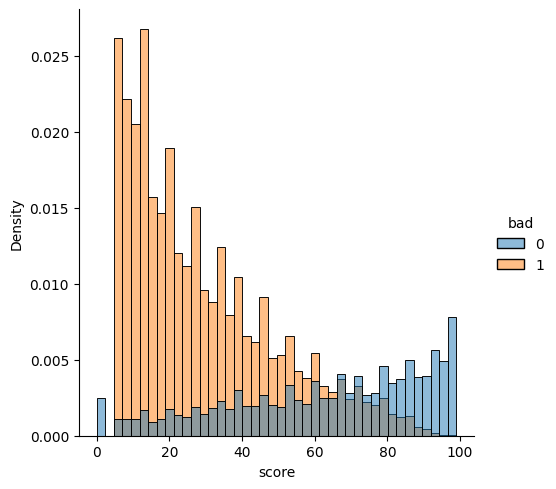

In [14]:
# Checking if score and 'bad' boolean flag are related at a glance
sns.displot(data=df, x='score', hue='bad', stat='density')

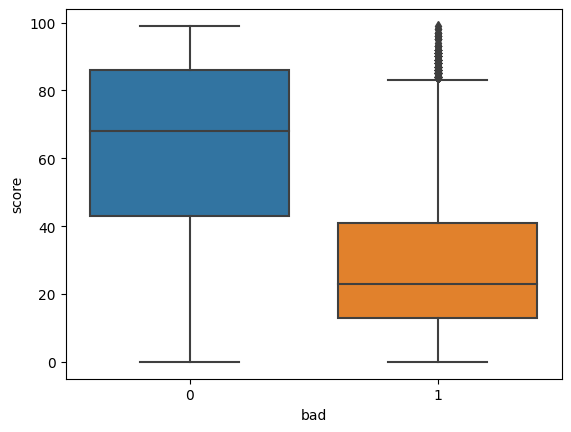

In [15]:
# A more clear view using boxplots
sns.boxplot(data=df, x='bad', y='score')
plt.show()

# The higher the score, the less likely it is flagged as 'bad'

<Axes: ylabel='bad'>

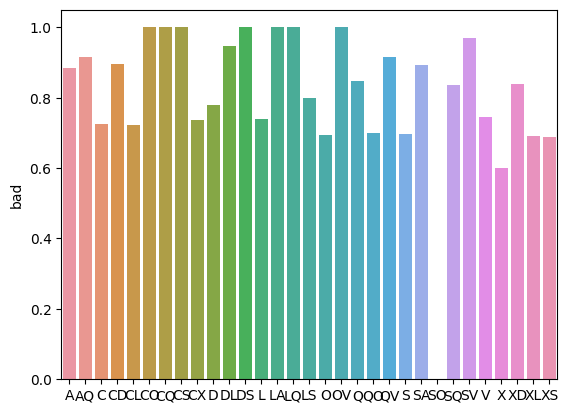

In [16]:
# Get average values by spectral class, dropping neo since it is categorical
class_averages = df.drop('neo', axis=1).groupby('class').mean()

# Plot their rate of being 'bad'
sns.barplot(x=class_averages.index.tolist(), y = class_averages['bad'])

<Axes: ylabel='bad'>

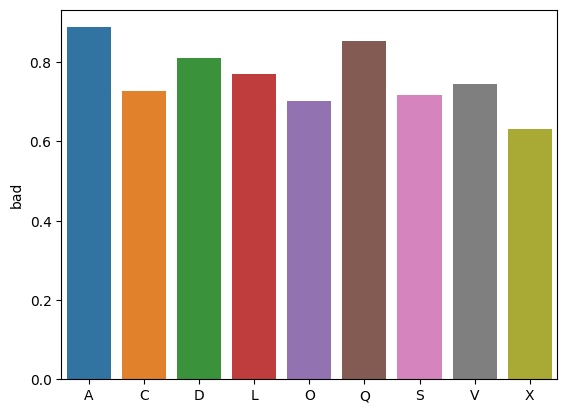

In [17]:
df_split_classes = df.copy(deep=True)

# Separate class into class1 and class2
df_split_classes['class1'] = df['class'].str[0]
df_split_classes['class2'] = df['class'].str[-1]


# Now lets look at the averages by just the main class
main_class_averages = df_split_classes.drop(['neo', 'class', 'class2'], axis=1).groupby('class1').mean()
main_class_averages
sns.barplot(x=main_class_averages.index.tolist(), y = main_class_averages['bad'])

In [18]:
# Set up one hot encoder
ohe = OneHotEncoder(sparse=False)
split_classes_cat = ['class1', 'class2', 'bad', 'neo']

# Get encoded categorical features
enc_arr = ohe.fit_transform(df_split_classes[split_classes_cat])

# Format them in a DataFrame with the correct labels
enc_df = pd.DataFrame(enc_arr, columns=ohe.get_feature_names_out())

# Concatonate the encoded DataFrame with our split classes DataFrame
df_ohe = pd.concat([enc_df, df_split_classes[numerical]], axis=1)
df_ohe

c:\Users\rules\OneDrive\Desktop\Projects\project\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,class1_A,class1_C,class1_D,class1_L,class1_O,class1_Q,class1_S,class1_V,class1_X,class2_A,...,abs_mag,osc_semimaj_ax,osc_inclin,diameter,albedo,rot_per,asc_node_long,peri,mean_anomaly,osc_eccentricity
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.89,2.68685,12.01945,52.393,0.046,4.715,128.90,263.98,53.17,0.21050
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,9.68,2.79380,26.39115,32.927,0.227,11.770,141.88,264.00,81.89,0.34930
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,8.96,2.89195,1.74445,40.056,0.206,14.085,4.15,128.27,310.38,0.01295
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,11.00,2.34815,7.59325,31.738,0.055,18.198,257.84,78.63,66.69,0.25780
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.70,3.16320,9.11765,123.891,0.065,26.468,325.94,268.88,129.51,0.19560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,16.50,2.88425,1.43440,NaN,NaN,NaN,193.80,208.74,26.07,0.08520
44057,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.80,2.69115,10.64395,NaN,NaN,NaN,211.85,248.29,127.78,0.15085
44058,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,16.10,2.86270,7.35990,NaN,NaN,NaN,104.66,291.45,67.24,0.07445
44059,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,17.20,2.18415,5.14830,NaN,NaN,NaN,243.81,172.78,260.67,0.10365


In [ ]:
def MI_corr(a, b):
    """
    Calculate the mutual information correlation between two arrays.

    :param a: The first array.
    :param b: The second array.
    :return: The mutual information correlation between 'a' and 'b'.
    """
    
    a = a.reshape(-1, 1)
    b = b.reshape(-1, 1)
    return  mutual_info_regression(a, b)[0]

In [21]:
# Get the DataFrame of mutual information, without 'rot_per' (null values)
df_mi_no_rotper = df_ohe.drop('rot_per', axis=1).dropna(axis=0).corr(method=MI_corr)

c:\Users\rules\OneDrive\Desktop\Projects\project\venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rules\OneDrive\Desktop\Projects\project\venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rules\OneDrive\Desktop\Projects\project\venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rules\OneDrive\Desktop\Projects\project\venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConve

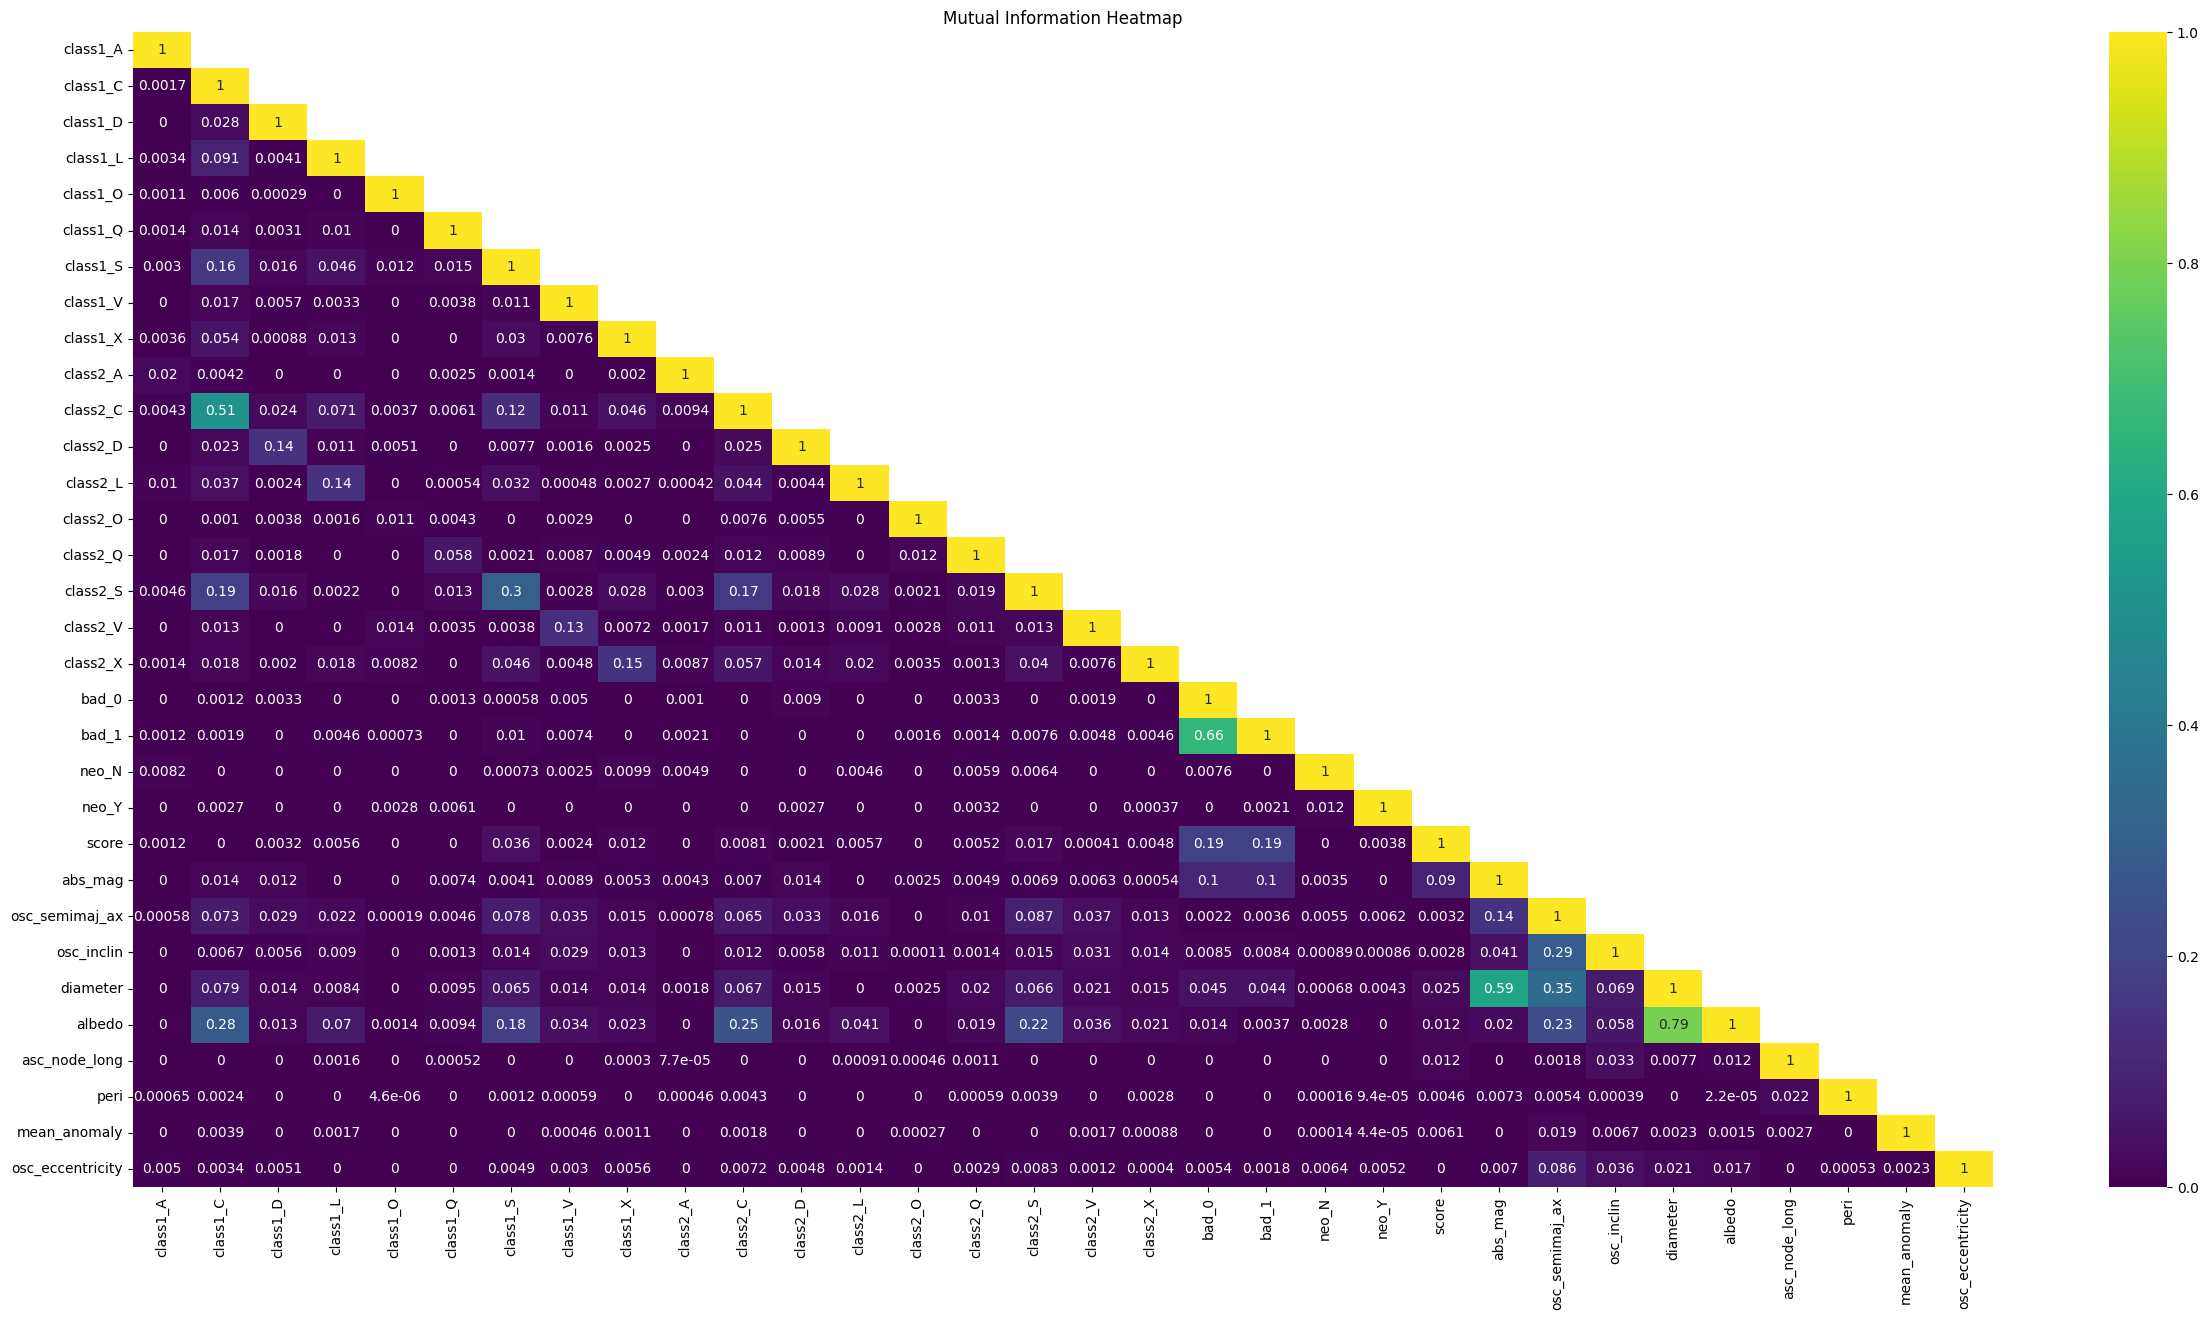

In [22]:
plt.figure(figsize=(30,15))

# Focus on bottom right triangle using a mask
mask = np.zeros_like(df_mi_no_rotper, dtype=bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# Plot mutual information heatmap
sns.heatmap(df_mi_no_rotper, annot=True, mask=mask, cmap='viridis')

plt.title('Mutual Information Heatmap')
plt.show()

c:\Users\rules\OneDrive\Desktop\Projects\project\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


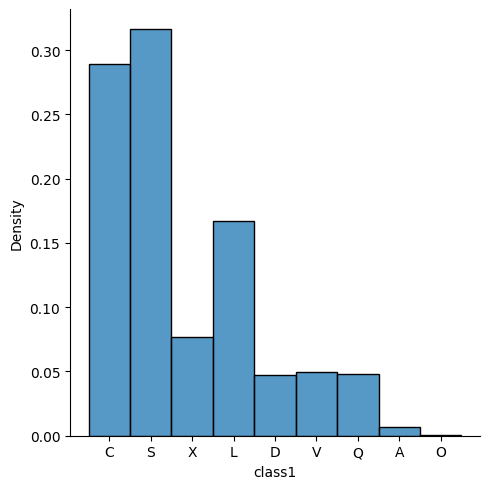

In [23]:
# Plot class1 density
sns.displot(df_split_classes, x='class1', stat='density')

### Feature observations
- Score: After modeling we can see if this is indicative in any way of correct prediction.
- Bad: After modeling we can see if this is indicative in any way of correct prediction. Test out eliminating bad rows?

- What is the difference between the oscillating and proper versions of these statistics?


- diameter: Lots of missing values. Drop or can we impute/learn more?
- albedo: Same thing as diameter. Max of this column is 1, meaning full geometric albedo. Is this possible or realistic?

- rot_per: Most values are missing. Likely drop, but can also investigate further


### Preliminary Decisions
The proper and oscillating measures of inclination, semimajor axis, and eccentricity have all ~1 r score. I'll use the oscillating versions since there they have no NA values.

osc_eccen and eccentricity are extremely similar columns, it's safe to say they are the same measures, taken separately. I'll use their average to create a new column.

The data seems fairly complex, and mutual info/linear correlation seem scarce. Combine this with the large number of class labels, and I hypothesize more complex models like ANN's or boosted/random forest trees will be needed.